# Library

In [ ]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.python.keras import Sequential
from math import sqrt
import tensorflow as tf

# Preprocessing

## Import data

In [ ]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [ ]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
pd.reset_option('display.max_columns')

<Axes: xlabel='time'>

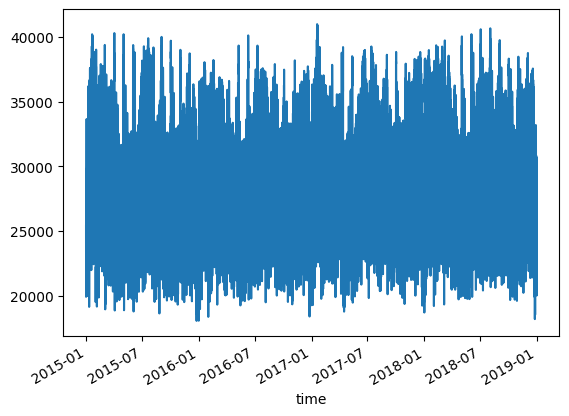

In [ ]:
df['total load actual'].plot()

<ipython-input-32-150425f37d81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total load actual'])


<Axes: xlabel='total load actual', ylabel='Density'>

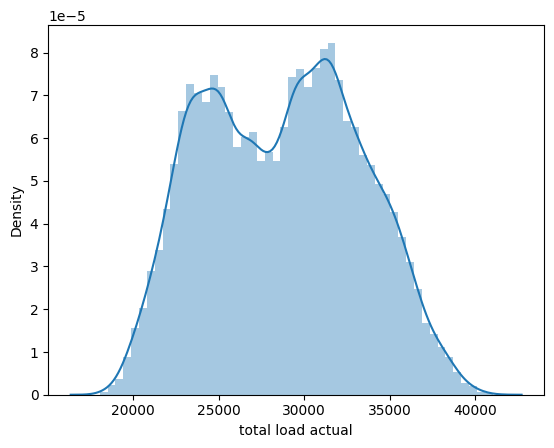

In [ ]:
sns.distplot(df['total load actual'])

<Axes: xlabel='total load actual'>

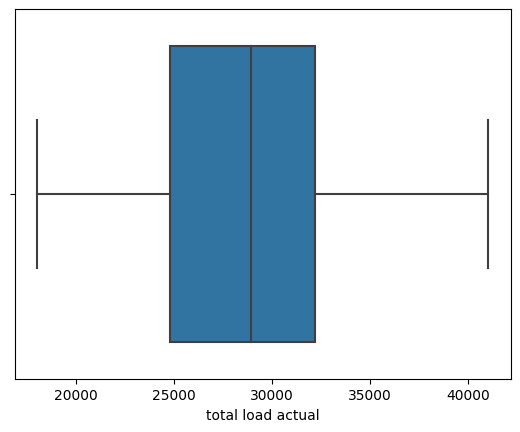

In [ ]:
sns.boxplot(x=df["total load actual"])

In [ ]:
df.corr()['total load actual'].sort_values(kind='quicksort')

generation hydro pumped storage consumption   -0.562809
forecast wind onshore day ahead                0.037597
generation wind onshore                        0.040080
generation waste                               0.077312
generation biomass                             0.083288
generation nuclear                             0.085664
generation other                               0.100690
generation hydro run-of-river and poundage     0.118570
generation other renewable                     0.181714
generation fossil brown coal/lignite           0.280461
generation solar                               0.396189
generation fossil hard coal                    0.396564
forecast solar day ahead                       0.404362
price actual                                   0.436127
price day ahead                                0.473869
generation hydro water reservoir               0.479481
generation fossil oil                          0.497089
generation fossil gas                          0

In [ ]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [ ]:
# All
# df_new = df.drop(df.columns[[10, 23, 25]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25]], axis=1)

# 3 teratas
df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# Target
# df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total load actual                 35028 non-null  float64
 1   generation fossil gas             35046 non-null  float64
 2   generation fossil oil             35045 non-null  float64
 3   generation hydro water reservoir  35046 non-null  float64
dtypes: float64(4)
memory usage: 1.3+ MB


In [ ]:
values = df_new.values

In [ ]:
values.shape

(35064, 4)

## Normalisasi

In [ ]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# # Z-score
# # scaled = stats.zscore(values, axis = 1)

# #Z-Score
# scaler = StandardScaler()
# scaled = scaler.fit_transform(values)

## Convert to Time Series

In [ ]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.319666,0.241789,0.360802,0.195210,0.276008,0.259359,0.351893,0.170436
2,0.276008,0.259359,0.351893,0.170436,0.204274,0.242438,0.349666,0.140933
3,0.204274,0.242438,0.349666,0.140933,0.141247,0.215334,0.356347,0.080078
4,0.141247,0.215334,0.356347,0.080078,0.096762,0.206150,0.347439,0.074013
5,0.096762,0.206150,0.347439,0.074013,0.081135,0.201557,0.347439,0.076377


In [ ]:
reframed.shape

(34994, 8)

In [ ]:
# All
# reframed.drop(reframed.columns[[x for x in range(26, 50)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(19, 36)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t)
1,0.319666,0.241789,0.360802,0.195210,0.276008
2,0.276008,0.259359,0.351893,0.170436,0.204274
3,0.204274,0.242438,0.349666,0.140933,0.141247
4,0.141247,0.215334,0.356347,0.080078,0.096762
5,0.096762,0.206150,0.347439,0.074013,0.081135


## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
train_X.shape

(34994, 1, 4)

# Model Building

### Grid Search

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation='tanh')))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 32, return_sequences = True, activation='tanh')))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(loss='mse', optimizer='rmsprop')
model.build(input_shape=train_X.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (34994, 1, 64)            9472      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (34994, 1, 64)            0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (34994, 1, 64)            24832     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (34994, 1, 64)            0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (34994, 1, 1)             65        
_________________________________________________________________
module_wrapper_5 (ModuleWrap (34994, 1, 1)             0         
Total params: 34,369
Trainable params: 34,369
Non-trainable params: 0
__________________________________________________

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
350/350 [==============================] - 21s 17ms/step - loss: 0.0698 - val_loss: 0.0274
Epoch 2/50
350/350 [==============================] - 4s 13ms/step - loss: 0.0546 - val_loss: 0.0203
Epoch 3/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0546 - val_loss: 0.0192
Epoch 4/50
350/350 [==============================] - 4s 13ms/step - loss: 0.0551 - val_loss: 0.0176
Epoch 5/50
350/350 [==============================] - 3s 10ms/step - loss: 0.0542 - val_loss: 0.0178
Epoch 6/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0534 - val_loss: 0.0184
Epoch 7/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0536 - val_loss: 0.0172
Epoch 8/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0542 - val_loss: 0.0164
Epoch 9/50
350/350 [==============================] - 4s 11ms/step - loss: 0.0545 - val_loss: 0.0173
Epoch 10/50
350/350 [==============================] - 3s 9ms/step - loss: 0.0542 - val_lo

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 1, 64)             9472      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 1, 64)             0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 1, 64)             24832     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 1, 64)             0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 1, 1)              65        
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1, 1)              0         
Total params: 34,369
Trainable params: 34,369
Non-trainable params: 0
__________________________________________________

# Evaluasi

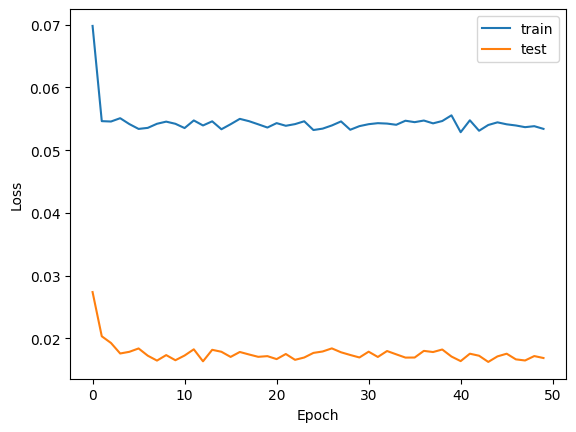

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
# pyplot.ylim(0, 0.1)
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_absolute_percentage_error as mape
np.seterr(divide='ignore', invalid='ignore')

# print('==============minmax===================')
print(f'MAPE test: %.4f' % (mape(inv_y, inv_yhat)*100))

# print('==============zscore===================')
# print(f'MAPE test: %.4f' % (mape(inv_yhat, inv_y)*100))

# print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.4f' % rmsetest)

print(f'R2 test is : %.5f' % r2_score(test_y, yhat))

MAPE test: 8.2143
RMSE Testing is : 0.1298
R2 test is : 0.57474


Actual : [[0.27600766]
 [0.2042744 ]
 [0.14124663]
 ...
 [0.43658048]
 [0.33777313]
 [0.27918517]]
Predicted: [[0.25759777]
 [0.22468187]
 [0.1665752 ]
 ...
 [0.41241294]
 [0.35772818]
 [0.28027067]]


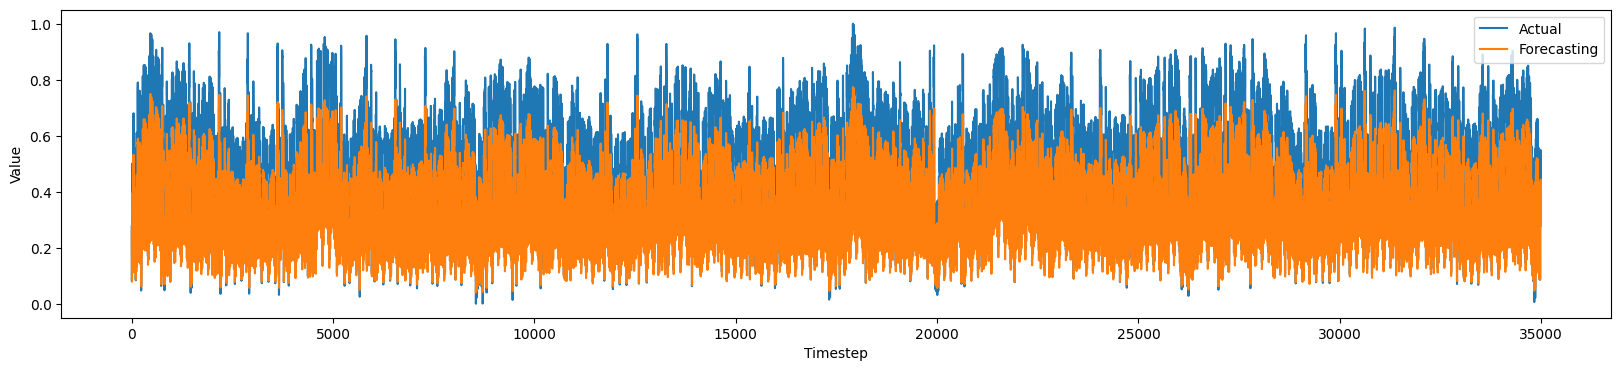

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.figure(figsize=(20,4))
pyplot.plot(test_y[:], label='Actual')
pyplot.plot(yhat[:], label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

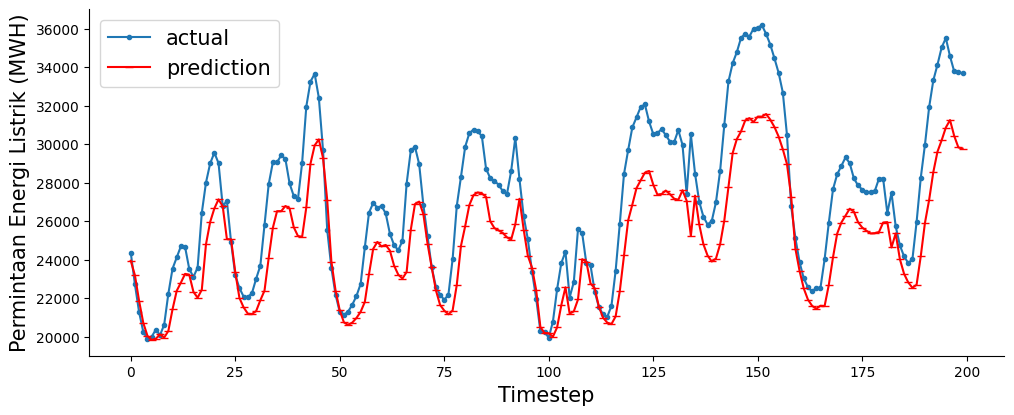

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(10,4))
pyplot.plot(aa, inv_y[:idx], marker='.', label="actual")
pyplot.plot(aa, inv_yhat[:idx], marker='_', label="prediction", color='r')
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('Permintaan Energi Listrik (MWH)', size=15)
pyplot.xlabel('Timestep', size=15)
pyplot.legend(fontsize=15)
pyplot.show()